In [1]:
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# caminho para o dado 
data_path = os.path.join('..', 'src', 'analytics', 'tempoHost.csv')
df = pd.read_csv(data_path)
display(df)

,id,host_since,tempoHost,review_scores_rating,price$,diferencaUltimoReview,binTempo
0,241032,2011-08-11,5,95.0,85.0,5.0,host_antigo
1,953595,2013-02-21,3,96.0,150.0,2.0,host_medio
2,3308979,2014-06-12,2,97.0,975.0,1.0,host_medio
3,7421966,2013-11-06,3,NaN,100.0,NaN,host_medio
4,278830,2011-11-29,5,92.0,450.0,3.0,host_antigo
...,...,...,...,...,...,...,...
3811,8101950,2015-04-13,1,80.0,359.0,0.0,host_novo
3812,8902327,2015-10-14,1,100.0,79.0,0.0,host_novo
3813,10267360,2015-12-30,1,NaN,93.0,NaN,host_novo
3814,9604740,2015-01-03,1,NaN,99.0,NaN,host_novo


Tratamento de dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3816 entries, 0 to 3815
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3816 non-null   int64  
 1   host_since             3816 non-null   object 
 2   tempoHost              3816 non-null   int64  
 3   review_scores_rating   3171 non-null   float64
 4   price$                 3816 non-null   float64
 5   diferencaUltimoReview  3191 non-null   float64
 6   binTempo               3816 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 208.8+ KB


In [4]:
# transformando data em datetime
df['host_since'] = pd.to_datetime(df['host_since'])

In [5]:
# tratando dados nulos em review_scores_rating
df = df.dropna(axis=0)

In [6]:
df.isnull().sum()

id                       0
host_since               0
tempoHost                0
review_scores_rating     0
price$                   0
diferencaUltimoReview    0
binTempo                 0
dtype: int64

Estudo de correlaçao

In [7]:
def correlation(df:pd.DataFrame):
    df = df.drop('id', axis=1)
    num = df.select_dtypes(exclude='object')
    corr = num.corr() # calculando correlaçao 
    
    # plotando correlaçao 
    plt.figure(figsize=(15,8))
    plt.title('Mapa de calor correlaçao')
    sns.heatmap(corr, annot=True, cmap='viridis', cbar=True)
    plt.tight_layout()
    plt.show()

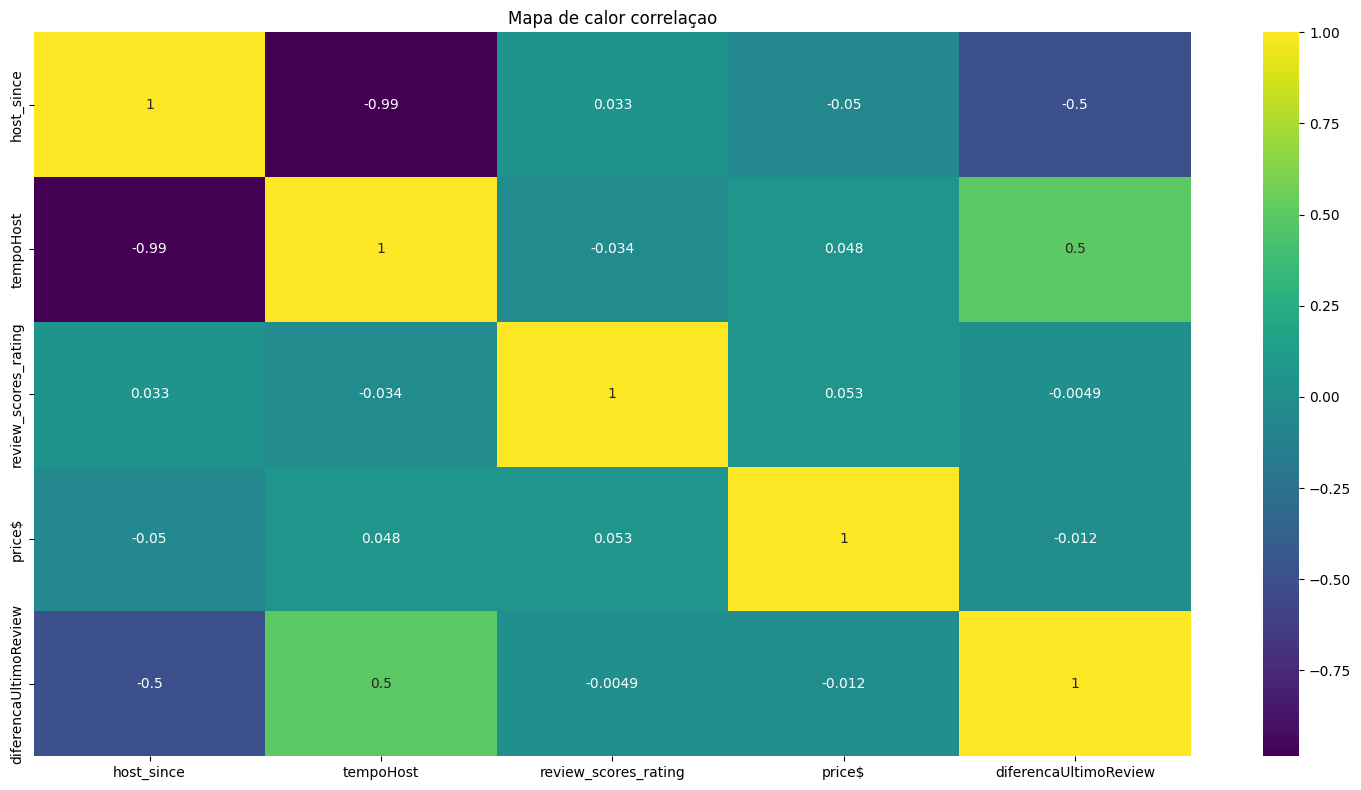

In [8]:
# aplicando funcao correlaton 
correlation(df)

EDA

In [9]:
df

,id,host_since,tempoHost,review_scores_rating,price$,diferencaUltimoReview,binTempo
0,241032,2011-08-11,5,95.0,85.0,5.0,host_antigo
1,953595,2013-02-21,3,96.0,150.0,2.0,host_medio
2,3308979,2014-06-12,2,97.0,975.0,1.0,host_medio
4,278830,2011-11-29,5,92.0,450.0,3.0,host_antigo
5,5956968,2010-12-25,6,95.0,120.0,0.0,host_antigo
...,...,...,...,...,...,...,...
3808,262764,2011-11-07,5,92.0,154.0,0.0,host_antigo
3809,8578490,2014-02-01,2,100.0,65.0,0.0,host_medio
3810,3383329,2012-09-01,4,96.0,95.0,1.0,host_antigo
3811,8101950,2015-04-13,1,80.0,359.0,0.0,host_novo


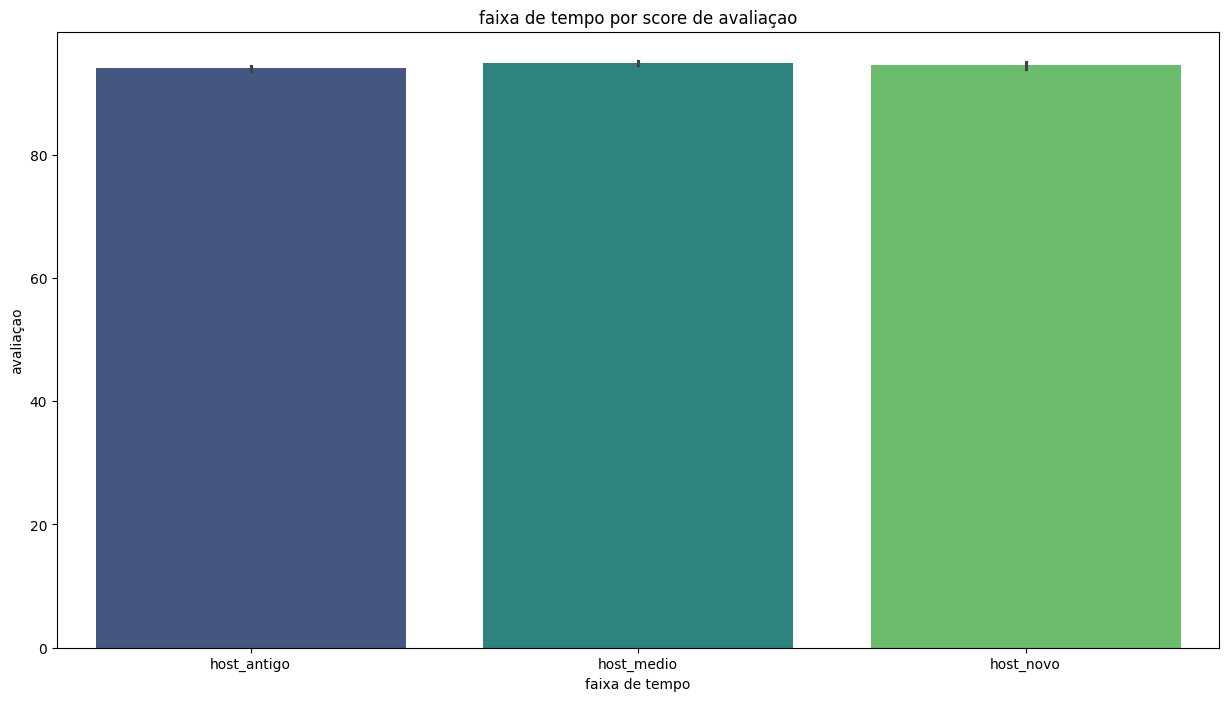

In [10]:
plt.figure(figsize=(15,8))
plt.title('faixa de tempo por score de avaliaçao')
sns.barplot(data=df, x='binTempo', y='review_scores_rating', palette='viridis')
plt.xlabel('faixa de tempo')
plt.ylabel('avaliaçao')
plt.show()

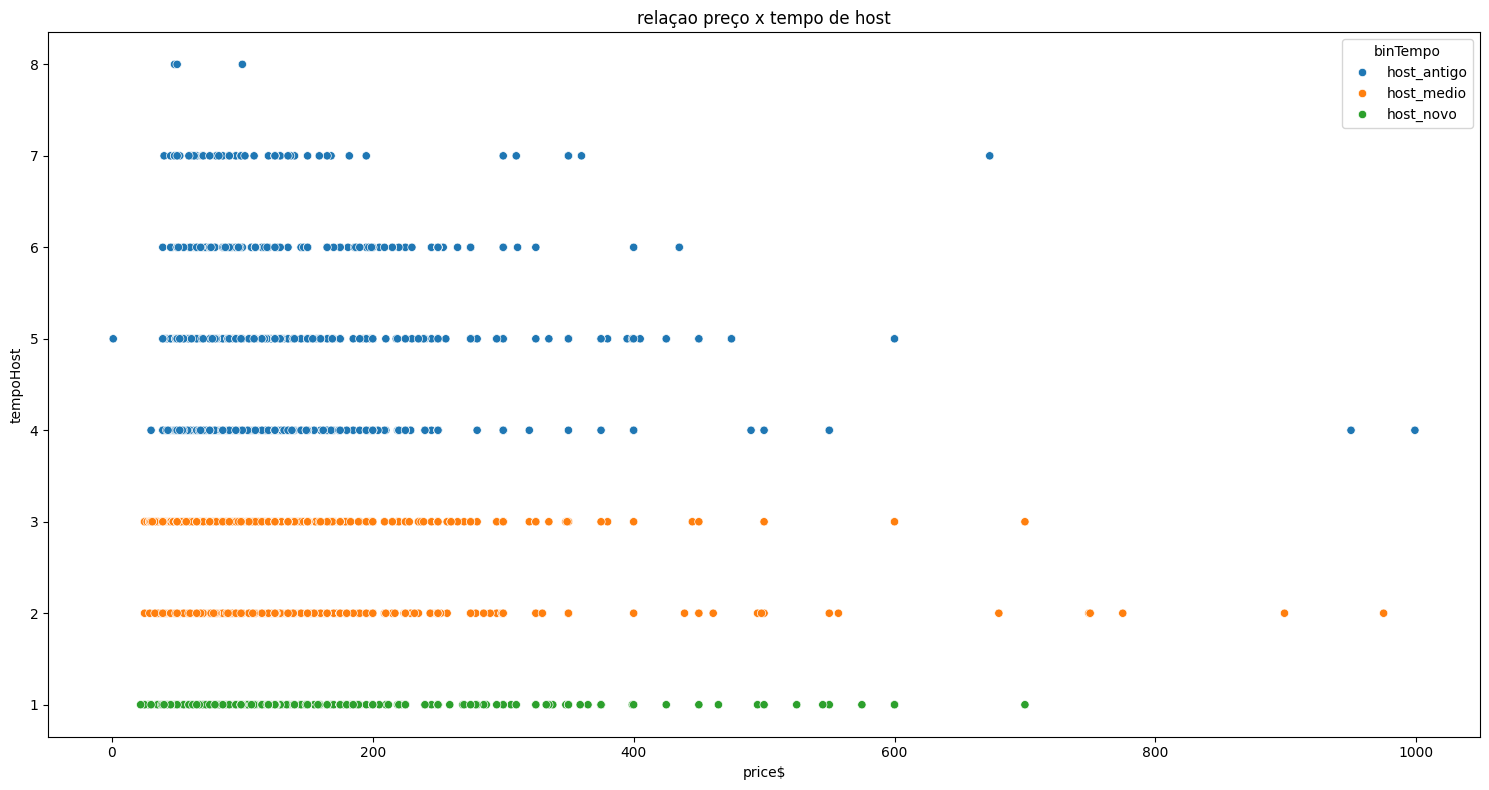

In [32]:
# vizualizando se o tempo de host impacta no preço do aluguel 
plt.figure(figsize=(15,8))
plt.title('relaçao preço x tempo de host')
sns.scatterplot(data=df, x='price$', y='tempoHost', hue='binTempo')
plt.tight_layout()
plt.show()

In [27]:
df_grouped = df.groupby('id')['price$'].sum().reset_index().sort_values(ascending=False, by='price$')
df_grouped

,id,price$
954,3345341,999.0
945,3308979,975.0
796,2720963,950.0
1349,4464824,899.0
1655,5534463,775.0
...,...,...
1428,4701205,25.0
2210,7064681,25.0
3148,9727857,25.0
3170,10248139,22.0


In [26]:
df[df['id'] == 3345341]

,id,host_since,tempoHost,review_scores_rating,price$,diferencaUltimoReview,binTempo
1208,3345341,2012-10-17,4,94.0,999.0,1.0,host_antigo


In [33]:
df[df['id'] == 4825073]

,id,host_since,tempoHost,review_scores_rating,price$,diferencaUltimoReview,binTempo
3120,4825073,2011-05-27,5,100.0,1.0,0.0,host_antigo


Verificamos que o tempo de atuação do host não impacta significativamente nem no valor do aluguel nem na avaliação (rating) do provedor.

Não há correlação que indique uma relação linear nessa hipótese. Isso não significa que não exista uma causa, mas sim uma possível paralelização.